# matplotlib Artist(各种图形结构)
matplotlib的原理是 用Artist对象在画布(canvas)上绘制(render)图形
这三步分别对应了三个层次的API：
1. matplotlib.backend_bases.FigureCanvas 代表了绘图区 所有图像都是在绘图区完成的
2. matplotlib.backend_bases.Renderer 代表了渲染器 可以理解为画笔
3. matplotlib.artist.Artist 代表了图标组件

**前两个部分处理程序和计算机底层的交互 第三层的Artist是具体调用的接口来作图**
## Artist分类
Artist有两种类型 primitives和containers
primitive是基本要素 包含标准图形 曲线Line2D 文字text 矩形Rectangle 图像image
container是容器用来装基本要素(primitive)的 包括图形figure 坐标系axes 和 坐标轴axis

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

## primitives
### 2DLines
2DLines主要是处理曲线的绘制
常用的参数：
1. xdata x轴的取值 如果不显式定义则是range(1,len(ydata)+1)即从1到len(ydata)
2. ydata y轴的取值
3. linewidth 线条宽度
4. linestyle 线条形式
5. color 现调颜色
6. marker 点的标记
7. markersize 标记的大小

设置Line的属性有三种
1. 直接plot()函数设置
2. 获取line对象进行设置
3. 获得line属性 使用setp()函数设置

line的种类：
1. 绘制直线line
2. 带errorbar的误差折线图
errorbar的参数不同的有 yerr xerr ecolor elinewidth都是指定error部分的属性

line的绘制方法：
1. plot绘制
2. Line2D对象绘制(了解)

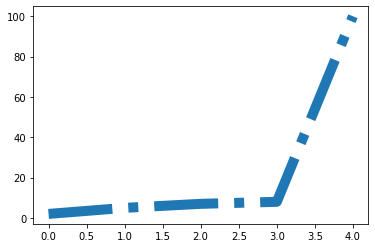

In [6]:
# 2DLines
# 直接plot设置
x = range(0,5)
y = [2,5,7,8,100]
plt.plot(x, y, linewidth = 10, linestyle='-.') # 直接在plot的参数中设置
plt.show()

<class 'matplotlib.lines.Line2D'>


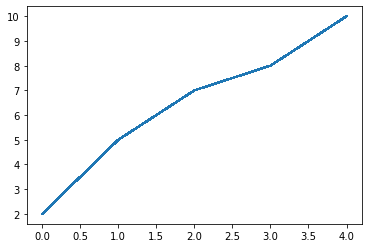

In [12]:
# 获得line的对象 对其调用函数方法
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x,y,'-') # plt.plot()方法返回line2D对象 注意一定要带逗号
print(type(line))
line.set_antialiased(False) # 关闭抗锯齿 用line对象的函数进行实现

<class 'list'>


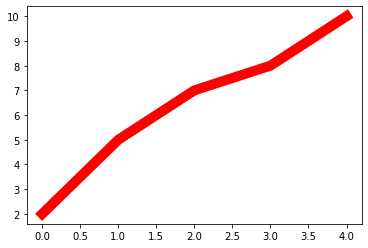

In [17]:
# 获得线属性 用plt.step()函数进行设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y) # 不加逗号返回值是list
print(type(lines))
plt.setp(lines, color = 'r', linewidth = 10); # plt.setp可以处理list

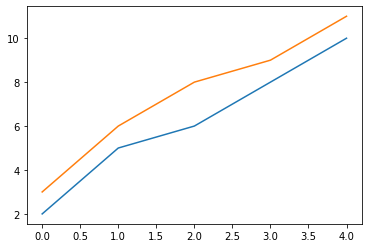

In [20]:
# plot绘制line
x = range(0,5)
y1 = [2,5,6,8,10]
y2 = [3,6,8,9,11]

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.lines # 可以看到ax.lines中有两个Line2D对象

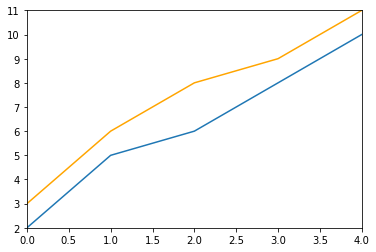

In [22]:
# Line2D对象绘制
x = range(0,5)
y1 = [2,5,6,8,10]
y2 = [3,6,8,9,11]

fig, ax = plt.subplots()
lines = [Line2D(x,y1), Line2D(x,y2,color='orange')] # 显示创建Line2D对象
for line in lines:
    ax.add_line(line) # add_line方法将自定义的Line2D对象加入ax中
ax.set_xlim(0,4)
ax.set_ylim(2,11);

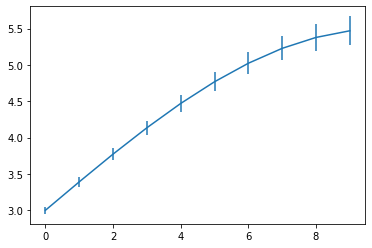

In [24]:
# errorbar 误差折线图
fig, ax = plt.subplots()

x = np.arange(10)
y = 2.5 * np.sin(x/ 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
ax.errorbar(x, y+3, yerr=yerr, label = 'both limits'); # ax.errorbar进行绘图

### patches
patches.Patch绘制二维图形
常见的有 矩形 多边形 楔形

#### 矩形
矩形常见的有直方图hist和条形图bar
##### 直方图
hist 参数：
1. x 数据集 对x的数据进行统计绘制直方图
2. bins 统计的区间分布
3. range 显示的区间 如果没有定义bins 使用range
4. density bool 默认False 显示频数统计结果
5. histtype 直方图的种类{'bar', 'barstacked', 'step', 'stepfilled'} 默认为bar 推荐使用默认 step是梯子状
6. align 柱状图的水平分布 {'left', 'mid', 'right'} 默认mid 推荐默认
7. log bool 默认False 坐标轴是否使用log
8. stacked bool 默认False 选择是否为堆积状图

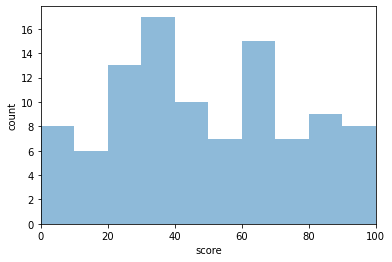

In [41]:
x = np.random.randint(0,100,100) # 生成0-100的100个数 进行直方图的绘制
bins = np.arange(0,101,10) # bins是各个区间的左边界值[bin1, bin2) [bin2, bin3) ...

fig, ax = plt.subplots()
ax.hist(x, bins, density = False, alpha=0.5) # density True纵轴是频率 False纵轴是count
plt.xlabel('score')
plt.ylabel('count')
plt.xlim(0,100);